In [361]:
import pandas as pd
import numpy as np
data = pd.read_csv('../original/data_processed.csv')

In [362]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['s_Esq45','s_Esq30','s_Frente','s_Dir30','s_Dir45','angulo_robo_destino']], data[['saida_linear','saida_angular']], shuffle=True, test_size=0.05)

In [363]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(x_train)
X_transformed_train = sc.transform(x_train)
X_transformed_test = sc.transform(x_test)

In [364]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=20000, max_features=1.0, min_samples_leaf=2)

In [365]:
rfg.fit(x_train, y_train)
y_pred = rfg.predict(x_test)

score_1 = rfg.score(x_test, y_test)
print(score_1)


0.8009849955690403


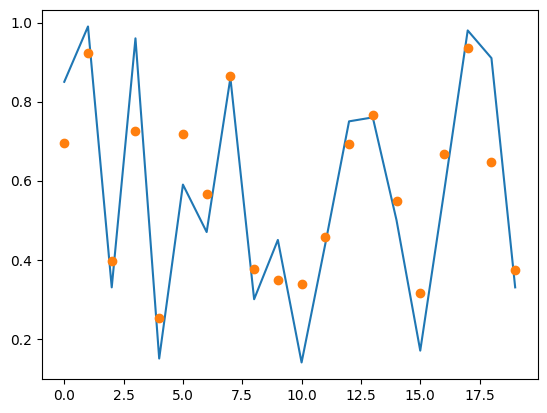

In [366]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:, 0], label='Linear Velocity Test Set')
plt.plot(y_pred[:, 0], 'o', label='Linear Velocity Prediction Set')

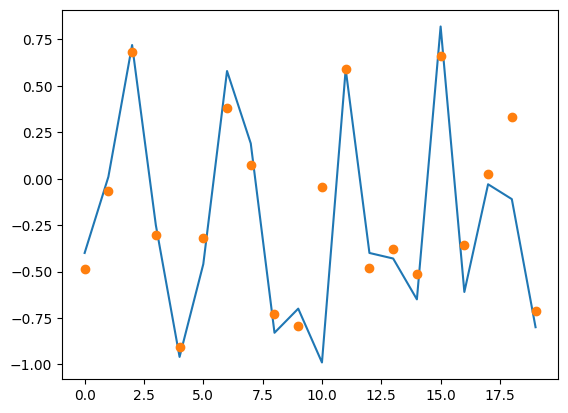

In [367]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:, 1], label='Angular Velocity Test Set')
plt.plot(y_pred[:, 1], 'o', label='Angular Velocity Prediction Set')

In [368]:
rfg.fit(X_transformed_train, y_train)
y_pred_transformed = rfg.predict(X_transformed_test)

score_2 = rfg.score(X_transformed_test, y_test)
print(score_2)

0.7808531652012718


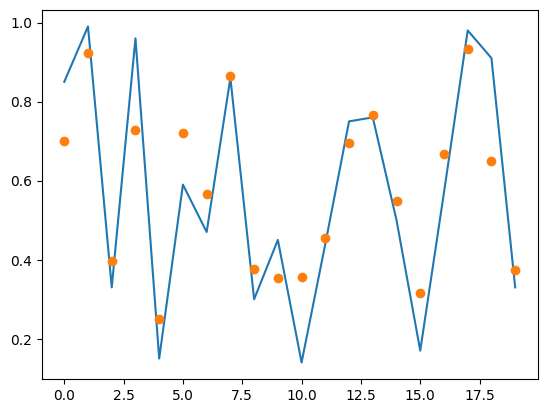

In [369]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:, 0], label='Linear Velocity Test Set')
plt.plot(y_pred_transformed[:, 0], 'o', label='Linear Velocity Prediction Set')

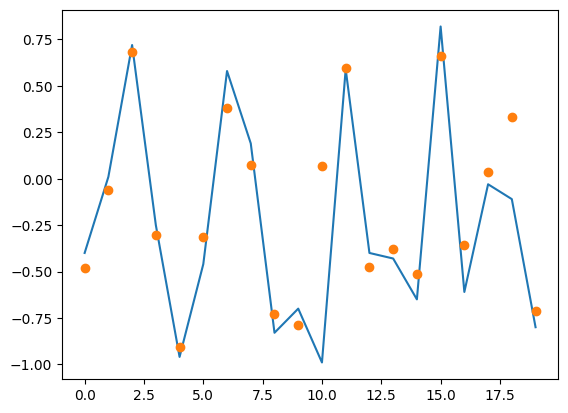

In [370]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:, 1], label='Angular Velocity Test Set')
plt.plot(y_pred_transformed[:, 1], 'o', label='Angular Velocity Prediction Set')